## LOSS COMPARISON

In [ ]:
import os
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

def parse_val_loss_by_group(directory):
    grouped_val_losses = defaultdict(dict)

    for filename in os.listdir(directory):
        if not filename.endswith(".out"):
            continue

        match = re.match(r"(Dex|DMSO)_(CustomLoss|MSELoss)_(\d+)\.out$", filename)
        if not match:
            continue

        group = match.group(1)
        loss_type = match.group(2)
        run_num = int(match.group(3))
        model_key = f"{group}_{loss_type}"

        val_losses = []
        with open(os.path.join(directory, filename), 'r') as f:
            for line in f:
                if "val_loss [" in line:
                    numbers = re.findall(r"[0-9eE\+\.-]+", line)
                    val_losses.extend([float(n) for n in numbers])

        if val_losses:
            grouped_val_losses[model_key][run_num] = val_losses

    return grouped_val_losses

def plot_validation_losses(val_loss_dict):
    for model_key, runs in val_loss_dict.items():
        plt.figure(figsize=(8, 5))
        for run_num, losses in sorted(runs.items()):
            plt.plot(losses, label=f"Run {run_num}")
        plt.title(f"Validation Loss - {model_key}")
        plt.xlabel("Epoch")
        plt.ylabel("Validation Loss")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.4)
        plt.tight_layout()
        plt.show()



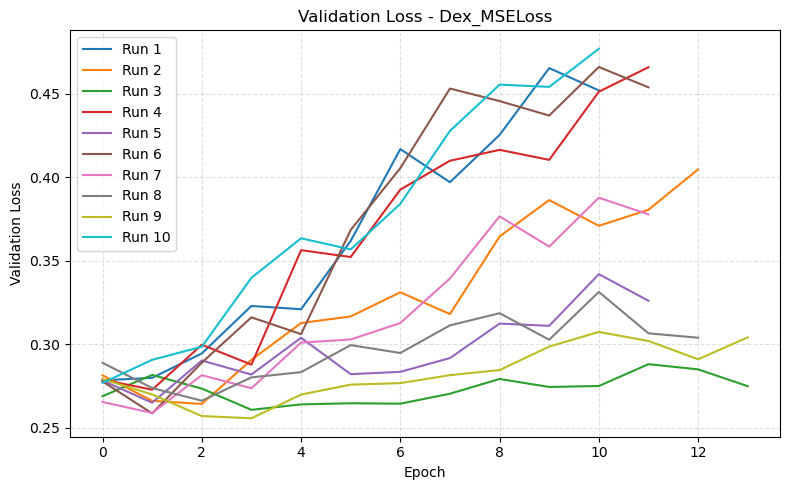

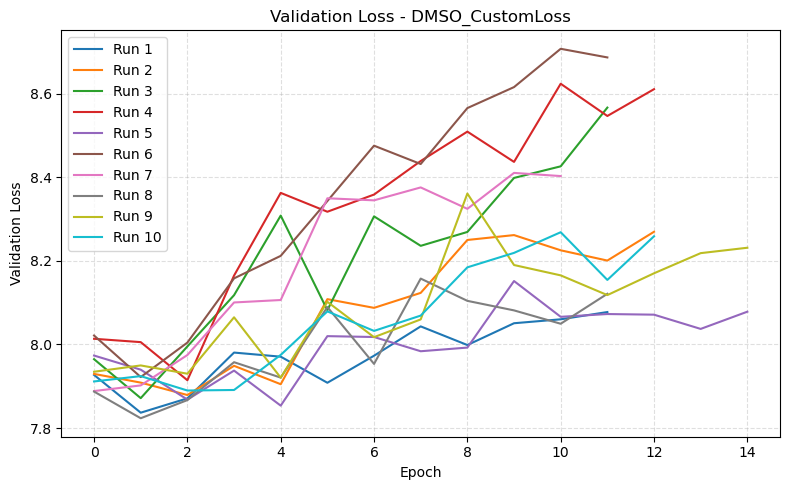

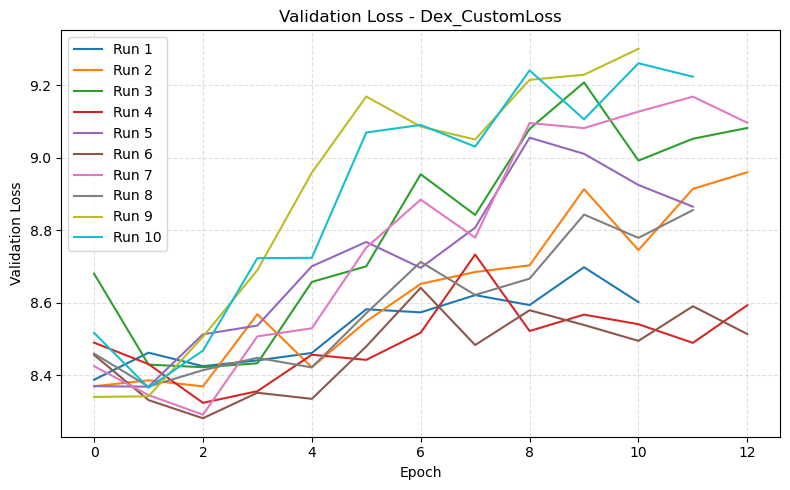

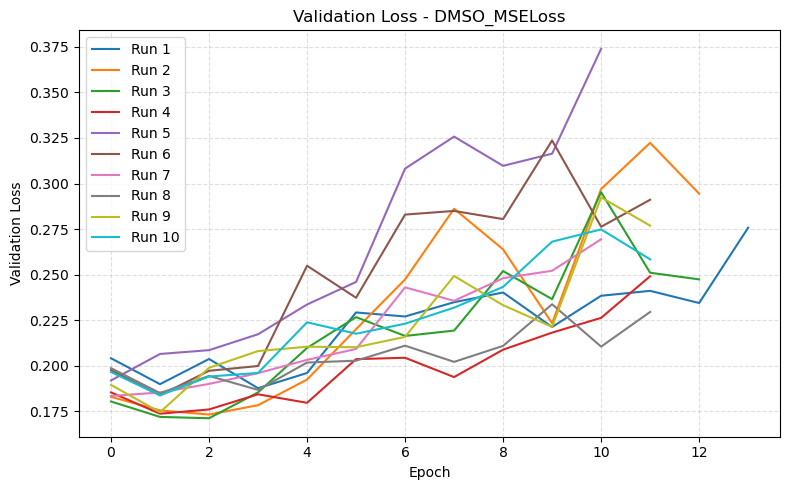

In [2]:
log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"  
val_losses = parse_val_loss_by_group(log_dir)
plot_validation_losses(val_losses)


In [3]:
val_loss_groups = parse_val_loss_by_group("/hpc/home/rv103/igvf/revathy/models/logs")

best_runs = {}
for model_key, runs in val_loss_groups.items():
    if not runs:
        continue
    best_run = min(runs.items(), key=lambda x: min(x[1]))
    best_runs[model_key] = {
        'run_num': best_run[0],
        'min_val_loss': min(best_run[1]),
        'val_loss_curve': best_run[1]
    }

for model_key, result in best_runs.items():
    print(f"{model_key}: Best run is {result['run_num']} with min val_loss = {result['min_val_loss']:.4f}")


Dex_MSELoss: Best run is 9 with min val_loss = 0.2558
DMSO_CustomLoss: Best run is 8 with min val_loss = 7.8233
Dex_CustomLoss: Best run is 6 with min val_loss = 8.2816
DMSO_MSELoss: Best run is 3 with min val_loss = 0.1712


In [4]:

files = ['/hpc/home/rv103/igvf/revathy/models/logs/DMSO_CustomLoss_8.out','/hpc/home/rv103/igvf/revathy/models/logs/DMSO_MSELoss_3.out']

for file in files:
    filename = file.split('/')[8].split('.')[0]
    with open(file, 'r') as f:
        for line in f:
            if "A549 mse" in line:
                print(f"{filename}: {line}")


DMSO_CustomLoss_8: A549 mse= 0.18066798

DMSO_MSELoss_3: A549 mse= 0.1728188



### Test set MSE - Custom Loss function vs MSE loss function - DMSO model

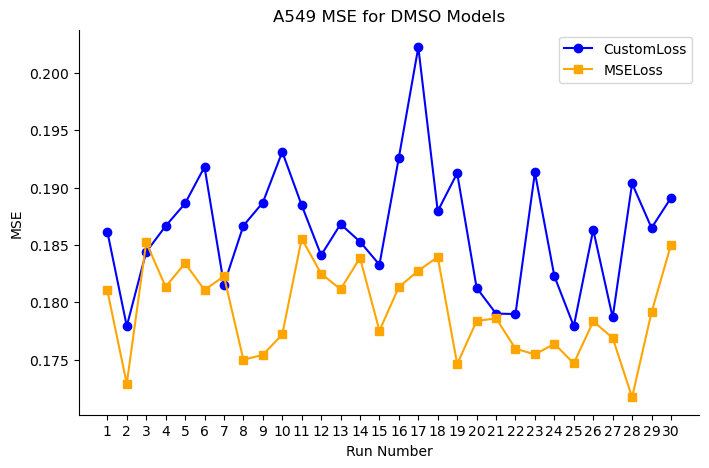

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "DMSO_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"DMSO_(CustomLoss|MSELoss)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "A549 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "CustomLoss":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break


customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(customloss.keys()), list(customloss.values()), marker='o', label='CustomLoss', color='blue')
plt.plot(list(mseloss.keys()), list(mseloss.values()), marker='s', label='MSELoss', color='orange')
plt.title("A549 MSE for DMSO Models")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
plt.legend()
sns.despine()
plt.show()


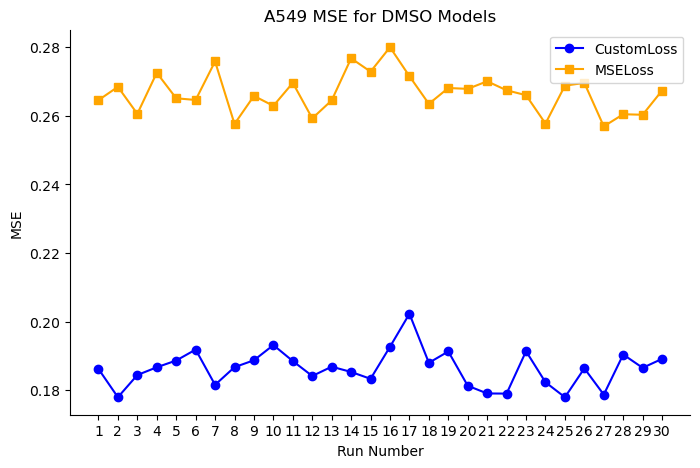

In [10]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "DMSO_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"DMSO_(CustomLoss|MSELoss)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "A549 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "CustomLoss":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break


customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(customloss.keys()), list(customloss.values()), marker='o', label='CustomLoss', color='blue')
plt.plot(list(mseloss.keys()), list(mseloss.values()), marker='s', label='MSELoss', color='orange')
plt.title("A549 MSE for DMSO Models")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
plt.legend()
sns.despine()
plt.show()


#### KDE graph for Custom Loss and MSE Loss - DMSO models

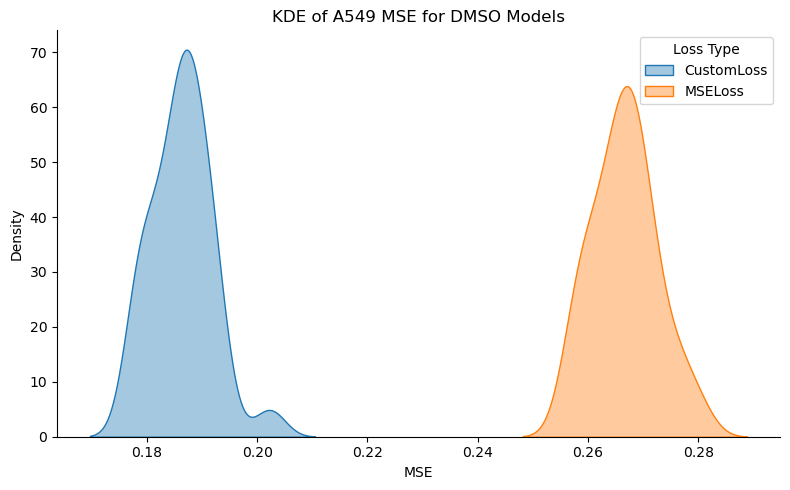

In [11]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "DMSO_*.out")
files = glob.glob(pattern)

customloss_vals = []
mseloss_vals = []

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"DMSO_(CustomLoss|MSELoss)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)

    with open(file, 'r') as f:
        for line in f:
            if "A549 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "CustomLoss":
                        customloss_vals.append(mse)
                    else:
                        mseloss_vals.append(mse)
                break

# Create a DataFrame for plotting
df = pd.DataFrame({
    'MSE': customloss_vals + mseloss_vals,
    'Loss Type': ['CustomLoss'] * len(customloss_vals) + ['MSELoss'] * len(mseloss_vals)
})

# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='MSE', hue='Loss Type', fill=True, common_norm=False, alpha=0.4)
plt.title("KDE of A549 MSE for DMSO Models")
plt.xlabel("MSE")
plt.ylabel("Density")
sns.despine()
plt.tight_layout()
plt.show()


### DEX-DMSO MSE loss models - MSE of thetas


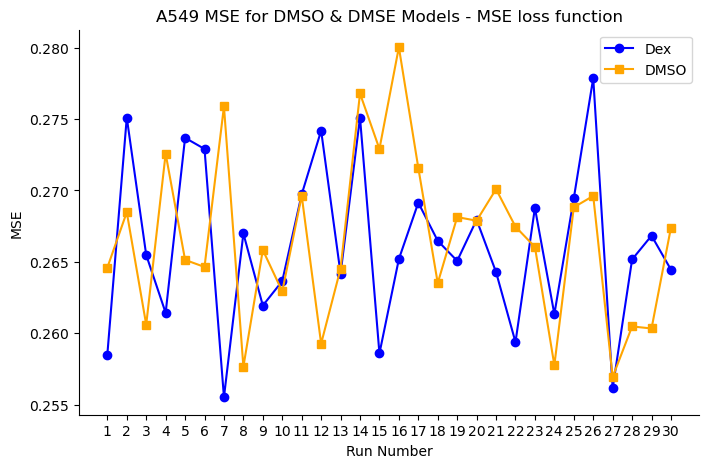

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_*.out")
files = glob.glob(pattern)

Dex = {}
DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"(Dex|DMSO)_MSELoss_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "A549 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Dex":
                        Dex[run_num] = mse
                    else:
                        DMSO[run_num] = mse
                break


Dex = dict(sorted(Dex.items()))
DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(Dex.keys()), list(Dex.values()), marker='o', label='Dex', color='blue')
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', label='DMSO', color='orange')
plt.title("A549 MSE for DMSO & DMSE Models - MSE loss function")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(set(Dex.keys()).union(DMSO.keys())))
plt.legend()
sns.despine()
plt.show()


In [9]:
print(min(Dex.values()))
print(min(DMSO.values()))

0.25551778
0.256936


In [8]:
print(Dex) ## -- model 7
print(DMSO) ## -- model 27

{1: 0.25850606, 2: 0.27510664, 3: 0.2654833, 4: 0.26142758, 5: 0.27368948, 6: 0.27290967, 7: 0.25551778, 8: 0.26698905, 9: 0.26193932, 10: 0.2636535, 11: 0.26972514, 12: 0.2741928, 13: 0.26417416, 14: 0.27510875, 15: 0.25858322, 16: 0.2651954, 17: 0.2691471, 18: 0.26647314, 19: 0.26506868, 20: 0.26794797, 21: 0.26428232, 22: 0.25937602, 23: 0.26878136, 24: 0.26133505, 25: 0.26945075, 26: 0.2778744, 27: 0.25614297, 28: 0.2651689, 29: 0.26683357, 30: 0.26445282}
{1: 0.2645942, 2: 0.26847762, 3: 0.26060024, 4: 0.27257904, 5: 0.26513726, 6: 0.26464456, 7: 0.27588415, 8: 0.2576523, 9: 0.2658314, 10: 0.26292697, 11: 0.26963896, 12: 0.25927046, 13: 0.26452434, 14: 0.27679563, 15: 0.2729091, 16: 0.28003532, 17: 0.2715843, 18: 0.26350975, 19: 0.26813588, 20: 0.26788393, 21: 0.27009487, 22: 0.2674639, 23: 0.26604342, 24: 0.25776017, 25: 0.26882154, 26: 0.26961973, 27: 0.256936, 28: 0.26047754, 29: 0.2603324, 30: 0.26740575}


## Validation and Training loss across runs

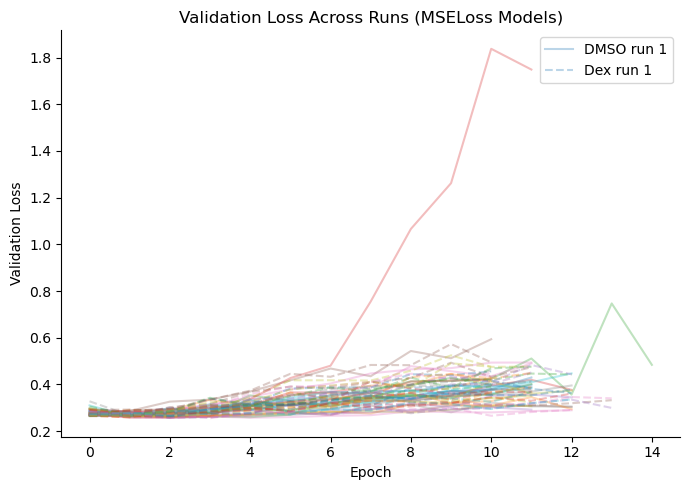

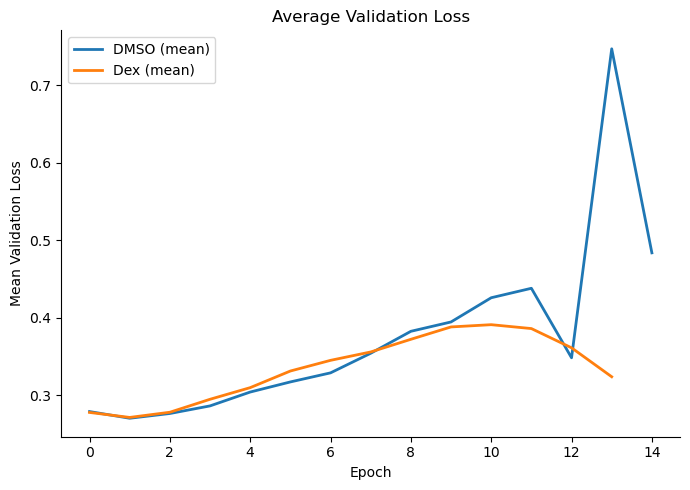

In [4]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_*.out")
files = glob.glob(pattern)

losses = {'DMSO': {}, 'Dex': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"(Dex|DMSO)_MSELoss_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break

for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

plt.figure(figsize=(7, 5))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['val_loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Validation Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
for condition, runs in losses.items():
    all_val_losses = [run['val_loss'] for run in runs.values()]
    max_len = max(len(l) for l in all_val_losses)
    for i in range(len(all_val_losses)):
        if len(all_val_losses[i]) < max_len:
            all_val_losses[i] += [None] * (max_len - len(all_val_losses[i]))

    import numpy as np
    val_loss_array = np.array(all_val_losses, dtype=np.float32)
    avg_val_loss = np.nanmean(val_loss_array, axis=0)
    plt.plot(avg_val_loss, label=f"{condition} (mean)", linewidth=2)

plt.title("Average Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Mean Validation Loss")
plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


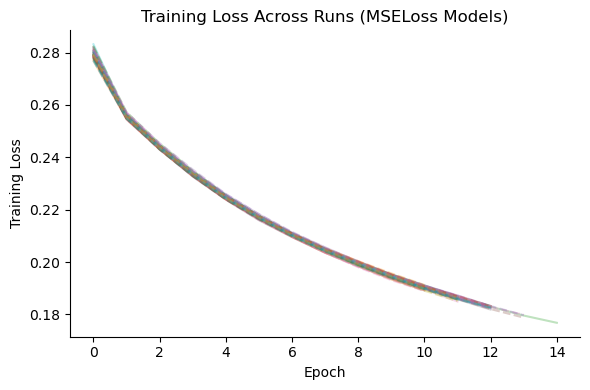

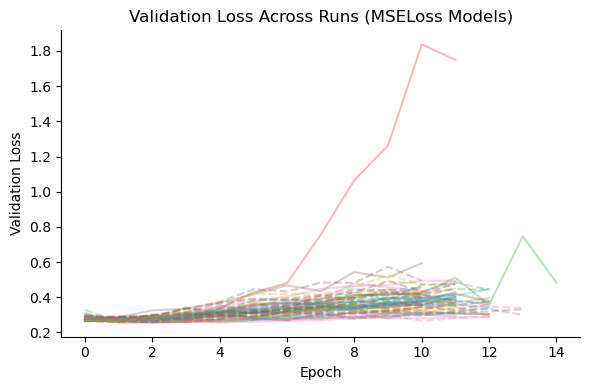

In [3]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_*.out")
files = glob.glob(pattern)

losses = {'DMSO': {}, 'Dex': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"(Dex|DMSO)_MSELoss_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break


for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

#Training Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Training Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#Validation Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['val_loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Validation Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


### Validation and Training loss for the old models (with 5 convolutional layers)

- Config file used: `/hpc/home/rv103/igvf/revathy/models/custom_loss/A549-MSELoss-old.config`
- Slurm script: `/hpc/home/rv103/igvf/revathy/models/scripts/multitask_pred_Dex_MSE_v3.slurm`, `/hpc/home/rv103/igvf/revathy/models/scripts/multitask_pred_DMSO_MSE_v3.slurm`

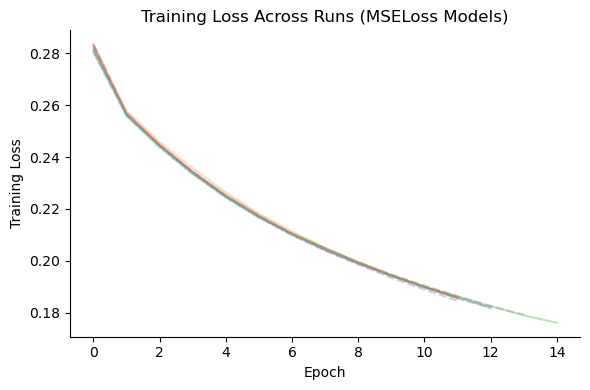

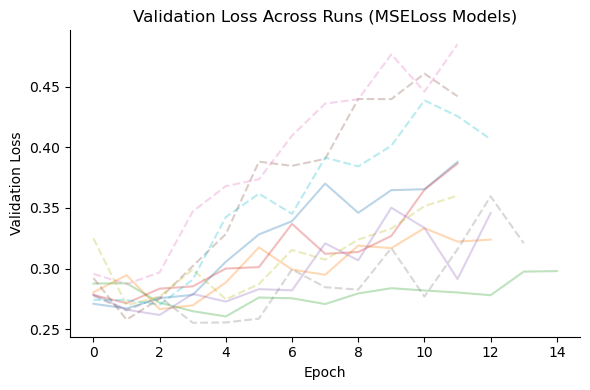

In [2]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_v3_*.out")
files = glob.glob(pattern)

losses = {'DMSO': {}, 'Dex': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"(Dex|DMSO)_MSELoss_v3_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break


for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

#Training Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Training Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#Validation Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['val_loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Validation Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


### Validation and Training loss for 6 layer convolutional model with varying EarlyStop

- Iteration 1: EarlyStop=5
- Iteration 2: EarlyStop=25



#### EarlyStop=5

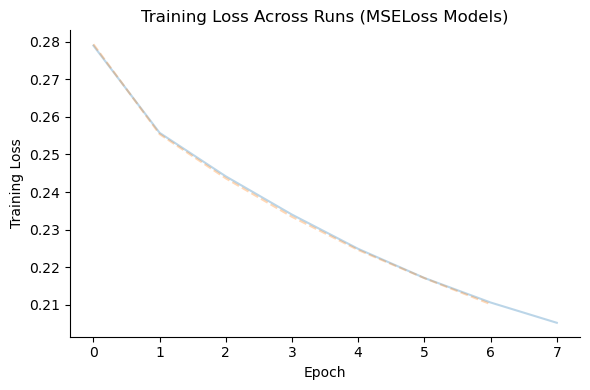

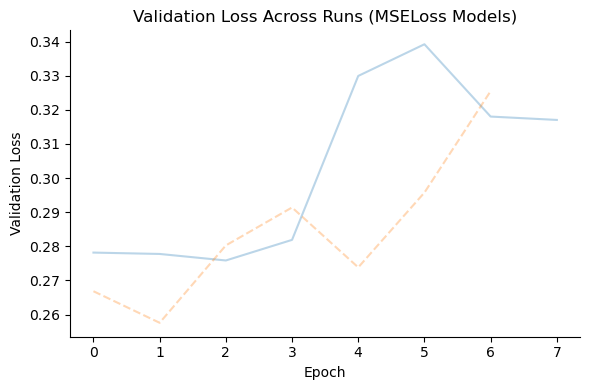

In [3]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_v2_*.out")
files = glob.glob(pattern)

losses = {'DMSO': {}, 'Dex': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"(Dex|DMSO)_MSELoss_v2_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break


for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

#Training Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Training Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#Validation Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['val_loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Validation Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


#### EarlyStop=25

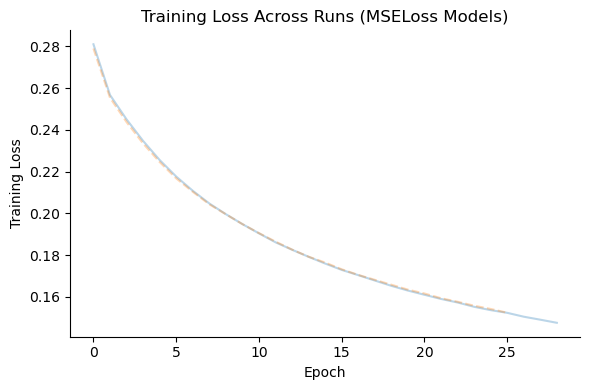

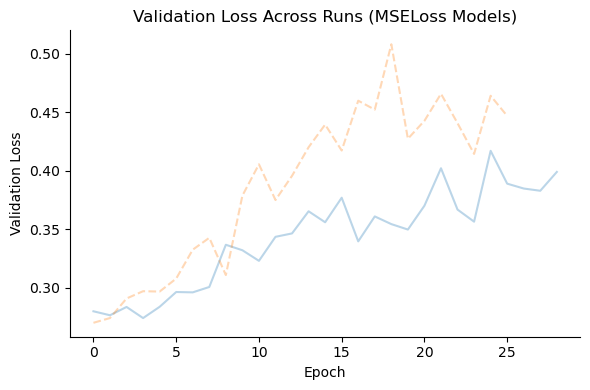

In [4]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_v1_*.out")
files = glob.glob(pattern)

losses = {'DMSO': {}, 'Dex': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"(Dex|DMSO)_MSELoss_v1_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break


for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

#Training Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Training Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#Validation Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['val_loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Validation Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


## K562 model - Custom loss

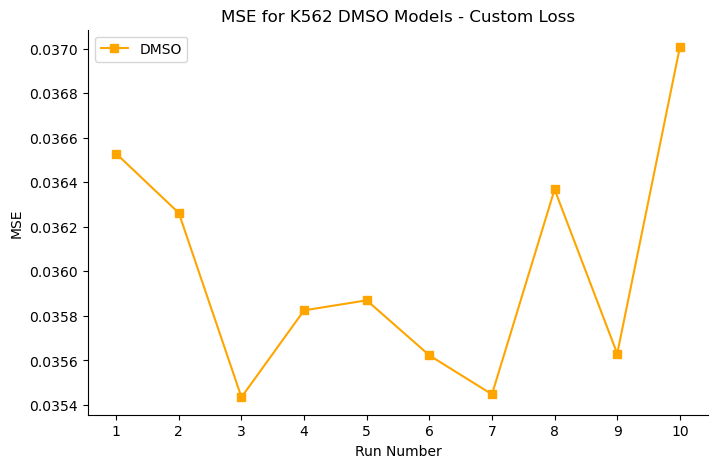

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_DMSO_CustomLoss_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_DMSO_CustomLoss_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', label='DMSO', color='orange')
plt.title("MSE for K562 DMSO Models - Custom Loss")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(DMSO.keys()))
plt.legend()
sns.despine()
plt.show()


File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_11.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_12.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_13.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_14.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_15.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_16.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_17.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_18.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_19.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1.5M_20.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1M_11.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1M_12.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1M_13.out
File not found: /hpc/group/igvf/revathy/models/logs/K562_1M_14.out
File not found: /hpc/group/igvf/revathy/mo

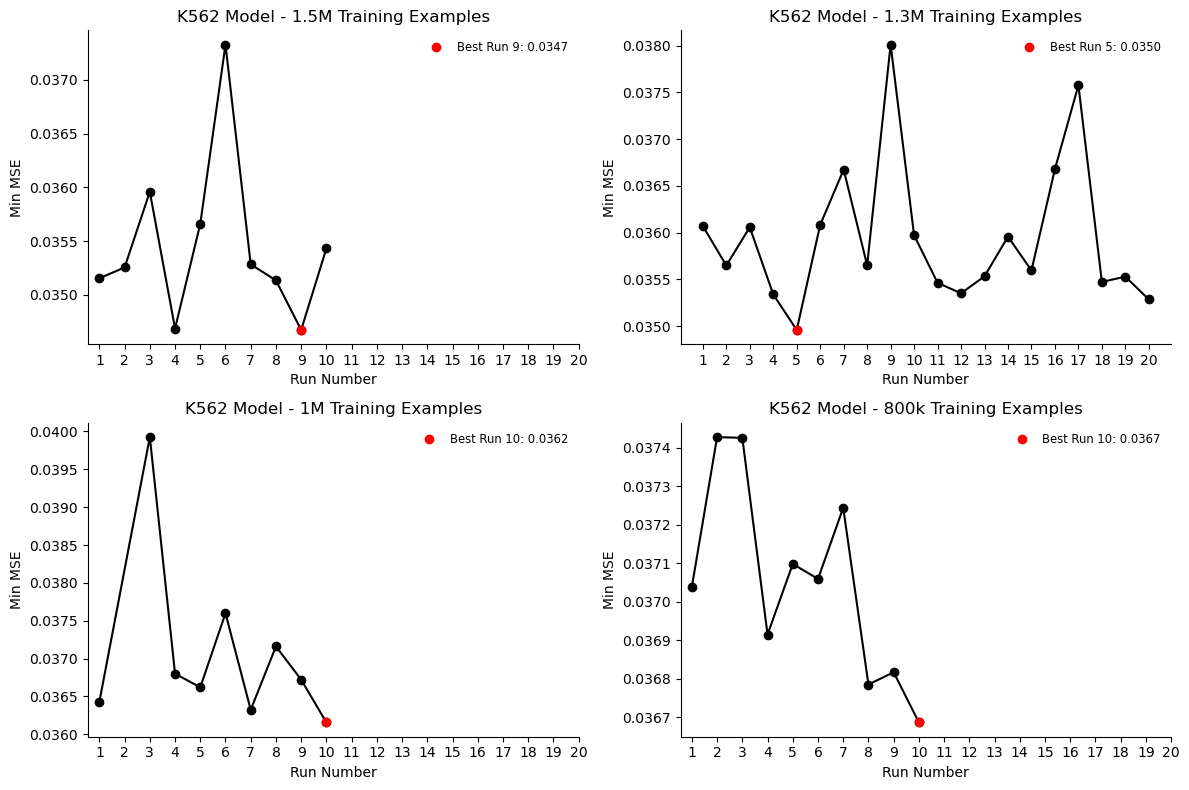

In [16]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
log_dir = "/hpc/group/igvf/revathy/models/logs"
datasets = ["1.5M", "1.3M", "1M", "800k"]
model_prefix = "K562"
runs = range(1, 21)

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# Loop through datasets
for idx, dataset in enumerate(datasets):
    run_min_mse = {}

    for run in runs:
        filename = f"{model_prefix}_{dataset}_{run}.out"
        filepath = os.path.join(log_dir, filename)

        try:
            with open(filepath, 'r') as f:
                mses = []
                for line in f:
                    if "mse=" in line.lower():
                        mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                        if mse_match:
                            mses.append(float(mse_match.group(1)))
                if mses:
                    run_min_mse[run] = min(mses)
        except FileNotFoundError:
            print(f"File not found: {filepath}")
            run_min_mse[run] = None

    # Prepare data
    x_vals = []
    y_vals = []
    for run in runs:
        mse = run_min_mse.get(run)
        if mse is not None:
            x_vals.append(run)
            y_vals.append(mse)

    # Plot
    ax = axs[idx]
    ax.plot(x_vals, y_vals, marker='o', color='black')

    # Identify run with overall min MSE
    if y_vals:
        min_index = y_vals.index(min(y_vals))
        best_run = x_vals[min_index]
        best_mse = y_vals[min_index]
        ax.plot(best_run, best_mse, 'o', color='red', label=f"Best Run {best_run}: {best_mse:.4f}")
        ax.legend(fontsize='small', loc='upper right', frameon=False)

    ax.set_title(f"K562 Model - {dataset} Training Examples")
    ax.set_xlabel("Run Number")
    ax.set_ylabel("Min MSE")
    ax.set_xticks(runs)
    # ax.grid(True)

sns.despine()
plt.tight_layout()
plt.show()


### K562-Biased downsampling models - loss comparison

In [ ]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_biased_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_biased_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', label='Biased', color='orange')
plt.title("MSE for K562 Biased downsampling models")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(DMSO.keys()))
plt.legend()
sns.despine()
plt.show()


## Loss comparison for parameters adjusted 6-layer models

<re.Match object; span=(5, 19), match='mse= 0.2899091'>
<re.Match object; span=(5, 20), match='mse= 0.17693399'>
<re.Match object; span=(5, 19), match='mse= 0.2817775'>
<re.Match object; span=(5, 19), match='mse= 0.2560149'>
<re.Match object; span=(5, 20), match='mse= 0.17743327'>
<re.Match object; span=(5, 20), match='mse= 0.18344522'>
<re.Match object; span=(5, 20), match='mse= 0.26761118'>
<re.Match object; span=(5, 19), match='mse= 0.2675526'>
<re.Match object; span=(5, 19), match='mse= 0.2584974'>
<re.Match object; span=(5, 20), match='mse= 0.27082375'>
<re.Match object; span=(5, 20), match='mse= 0.17600703'>
<re.Match object; span=(5, 20), match='mse= 0.18552518'>
<re.Match object; span=(5, 20), match='mse= 0.17208472'>
<re.Match object; span=(5, 20), match='mse= 0.17559074'>
<re.Match object; span=(5, 20), match='mse= 0.26606596'>
<re.Match object; span=(5, 20), match='mse= 0.26385966'>
<re.Match object; span=(5, 20), match='mse= 0.26152557'>
<re.Match object; span=(5, 19), matc

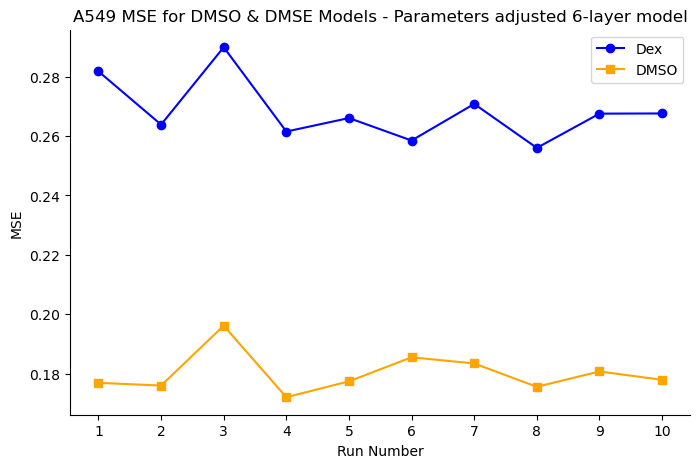

In [7]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_6layer_adjusted_*.out")
files = glob.glob(pattern)

Dex = {}
DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"(Dex|DMSO)_MSELoss_6layer_adjusted_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "A549 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                print(mse_match)
                
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Dex":
                        Dex[run_num] = mse
                    else:
                        DMSO[run_num] = mse
                break


Dex = dict(sorted(Dex.items()))
DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(Dex.keys()), list(Dex.values()), marker='o', label='Dex', color='blue')
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', label='DMSO', color='orange')
plt.title("A549 MSE for DMSO & DMSE Models - Parameters adjusted 6-layer model")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(set(Dex.keys()).union(DMSO.keys())))
plt.legend()
sns.despine()
plt.show()


<re.Match object; span=(0, 27), match='Min validation loss: 0.2901'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1753'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.2817'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.2558'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1755'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1817'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.2675'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.2675'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.2582'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.2705'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1741'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1836'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1705'>
<re.Match object; span=(0, 27), match='Min validation loss: 0.1739'>
<re.Match object; span=(0, 27), ma

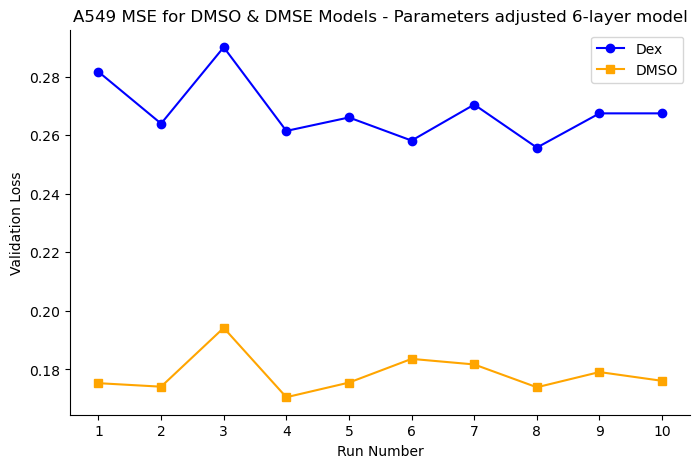

In [6]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_6layer_adjusted_*.out")
files = glob.glob(pattern)

Dex = {}
DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"(Dex|DMSO)_MSELoss_6layer_adjusted_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                loss_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                
                if loss_match:
                    loss = float(loss_match.group(1))
                    if loss_type == "Dex":
                        Dex[run_num] = loss
                    else:
                        DMSO[run_num] = loss
                break


Dex = dict(sorted(Dex.items()))
DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(Dex.keys()), list(Dex.values()), marker='o', label='Dex', color='blue')
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', label='DMSO', color='orange')
plt.title("A549 MSE for DMSO & DMSE Models - Parameters adjusted 6-layer model")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(set(Dex.keys()).union(DMSO.keys())))
plt.legend()
sns.despine()
plt.show()


### A549 5-layer model validation loss for Dex and DMSO

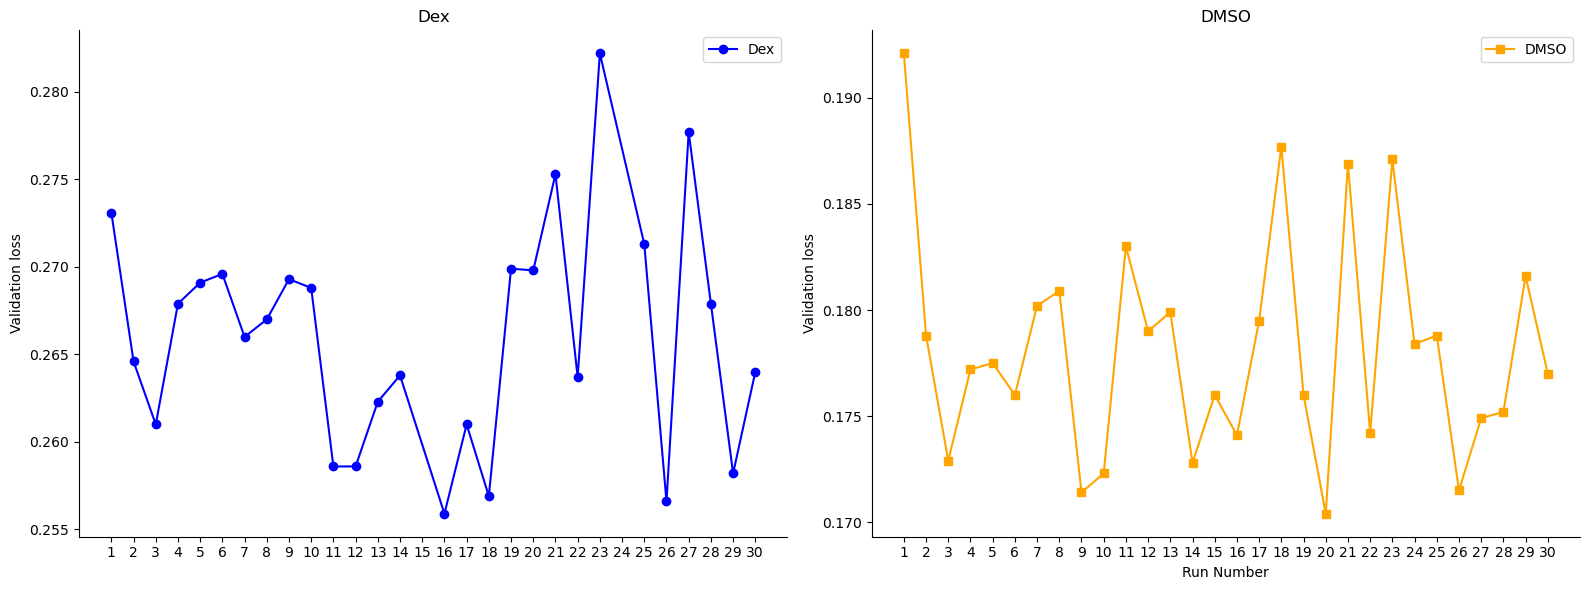

In [2]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_5layer_*.out")
files = glob.glob(pattern)

Dex = {}
DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"(Dex|DMSO)_MSELoss_5layer_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                loss_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                
                if loss_match:
                    loss = float(loss_match.group(1))
                    if loss_type == "Dex":
                        Dex[run_num] = loss
                    else:
                        DMSO[run_num] = loss
                break


Dex = dict(sorted(Dex.items()))
DMSO = dict(sorted(DMSO.items()))

fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)


axes[0].plot(list(Dex.keys()), list(Dex.values()), 
             marker='o', color='blue', label='Dex')
axes[0].set_title("Dex")
axes[0].set_ylabel("Validation loss")
axes[0].legend()
sns.despine(ax=axes[0])

# Plot MSELoss
axes[1].plot(list(DMSO.keys()), list(DMSO.values()), 
             marker='s', color='orange', label='DMSO')
axes[1].set_title("DMSO")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("Validation loss")
axes[1].set_xticks(sorted(set(Dex.keys()).union(DMSO.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


#### Validation loss for the 2 new runs of A549 MSE loss 5-layer model - Oct 29

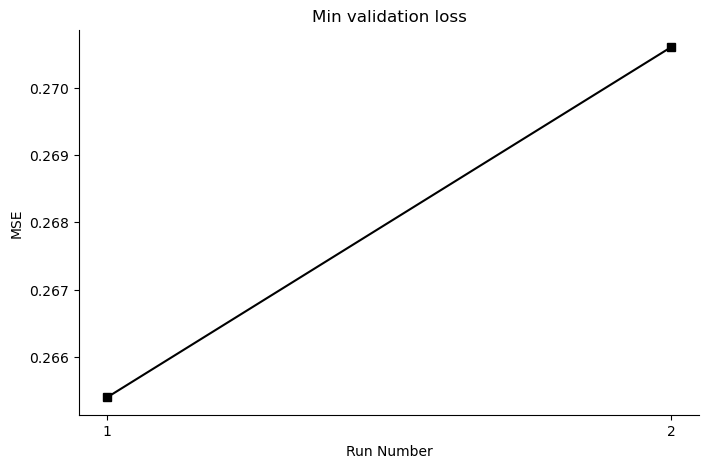

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "Dex_MSELoss_5layer_new_*.out")
files = glob.glob(pattern)

loss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"Dex_MSELoss_5layer_new_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    loss[run_num] = mse
                break

loss = dict(sorted(loss.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(loss.keys()), list(loss.values()), marker='s', color='black')
plt.title("Min validation loss")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(loss.keys()))
# plt.legend()
sns.despine()
plt.show()


### A549 6-layer model validation loss for Dex and DMSO

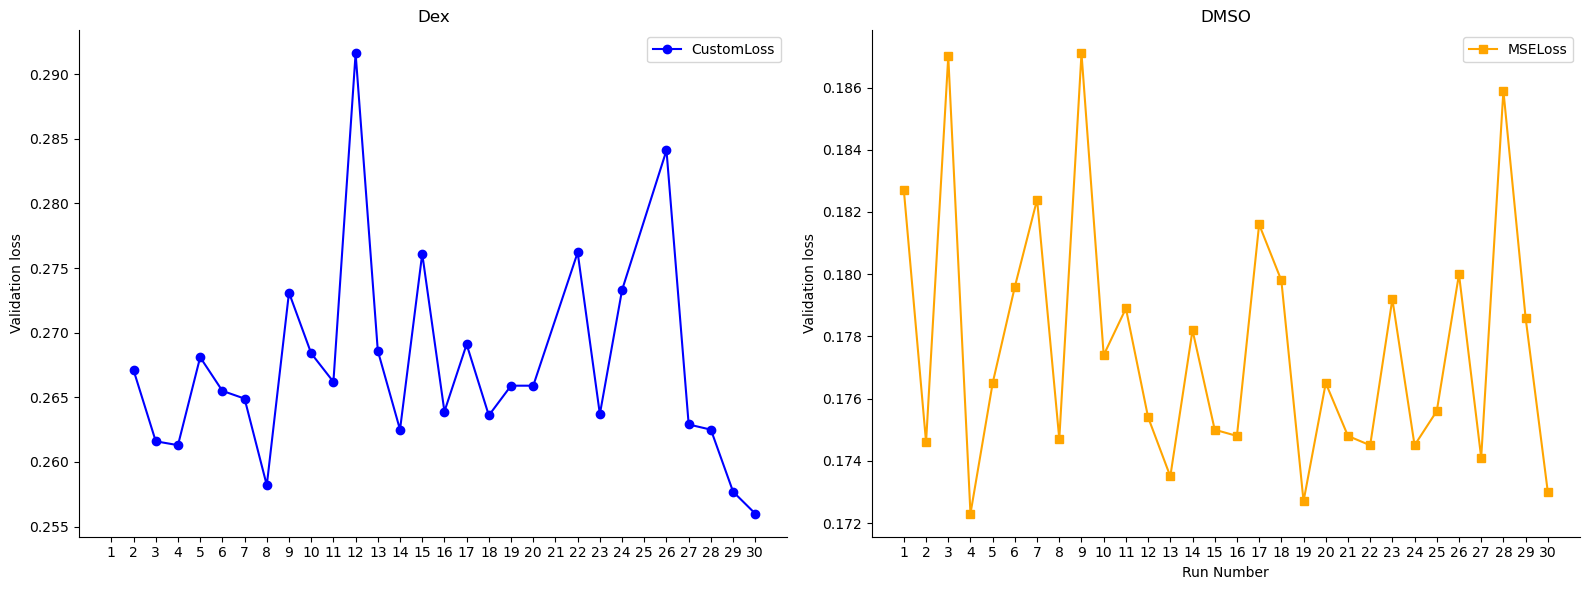

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_6layer_*.out")
files = glob.glob(pattern)

Dex = {}
DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"(Dex|DMSO)_MSELoss_6layer_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                loss_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                
                if loss_match:
                    loss = float(loss_match.group(1))
                    if loss_type == "Dex":
                        Dex[run_num] = loss
                    else:
                        DMSO[run_num] = loss
                break


Dex = dict(sorted(Dex.items()))
DMSO = dict(sorted(DMSO.items()))

fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)


axes[0].plot(list(Dex.keys()), list(Dex.values()), 
             marker='o', color='blue', label='Dex')
axes[0].set_title("Dex")
axes[0].set_ylabel("Validation loss")
axes[0].legend()
sns.despine(ax=axes[0])

# Plot MSELoss
axes[1].plot(list(DMSO.keys()), list(DMSO.values()), 
             marker='s', color='orange', label='DMSO')
axes[1].set_title("DMSO")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("Validation loss")
axes[1].set_xticks(sorted(set(Dex.keys()).union(DMSO.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


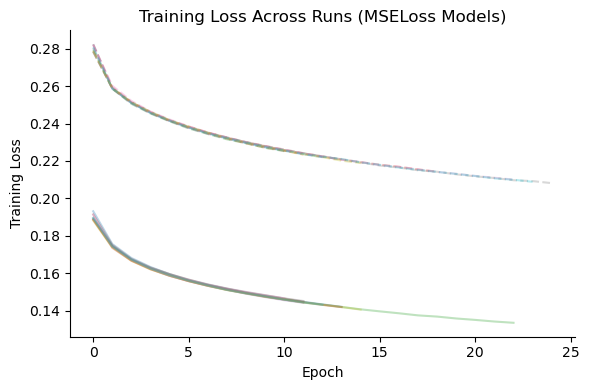

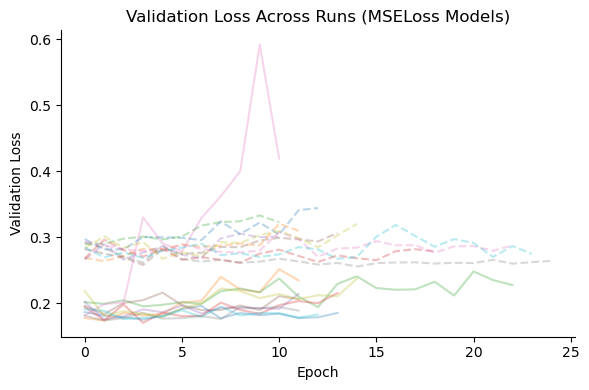

In [2]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "*_MSELoss_6layer_adjusted_*.out")
files = glob.glob(pattern)

losses = {'DMSO': {}, 'Dex': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"(Dex|DMSO)_MSELoss_6layer_adjusted_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break


for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

#Training Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Training Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

#Validation Loss
plt.figure(figsize=(6, 4))
for condition, runs in losses.items():
    for run_num, run_losses in runs.items():
        plt.plot(run_losses['val_loss'], alpha=0.3, label=f"{condition} run {run_num}" if run_num == list(runs.keys())[0] else "", linestyle='--' if condition == 'Dex' else '-')

plt.title("Validation Loss Across Runs (MSELoss Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
# plt.legend()
sns.despine()
plt.tight_layout()
plt.show()


## Loss comparison - K562 DeepSTARR models

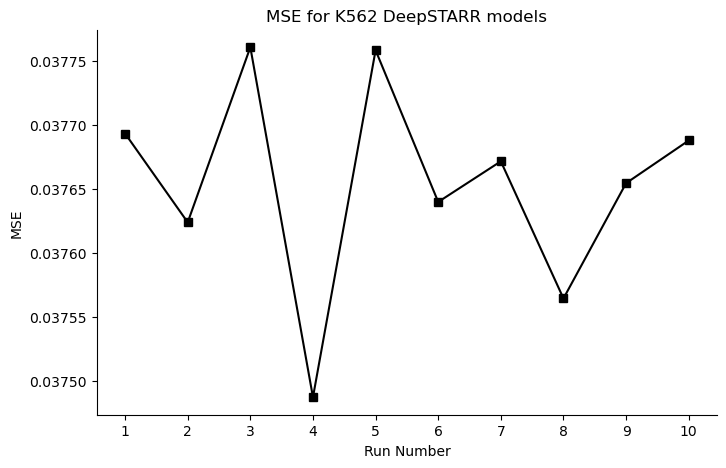

In [2]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_DeepSTARR_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_DeepSTARR_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='black')
plt.title("MSE for K562 DeepSTARR models")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


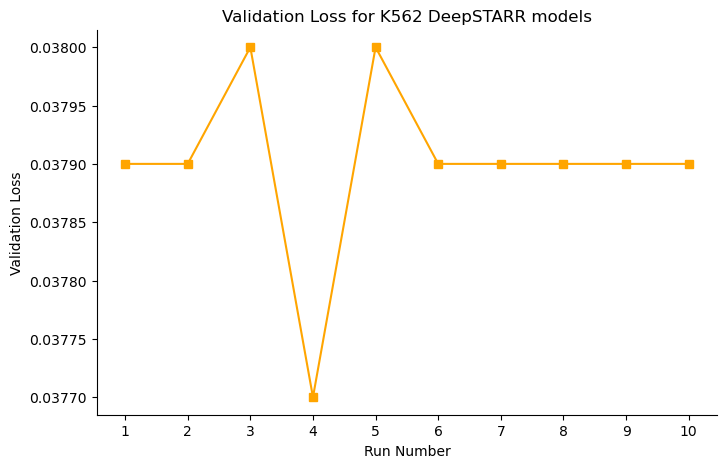

In [3]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_DeepSTARR_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_DeepSTARR_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='orange')
plt.title("Validation Loss for K562 DeepSTARR models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


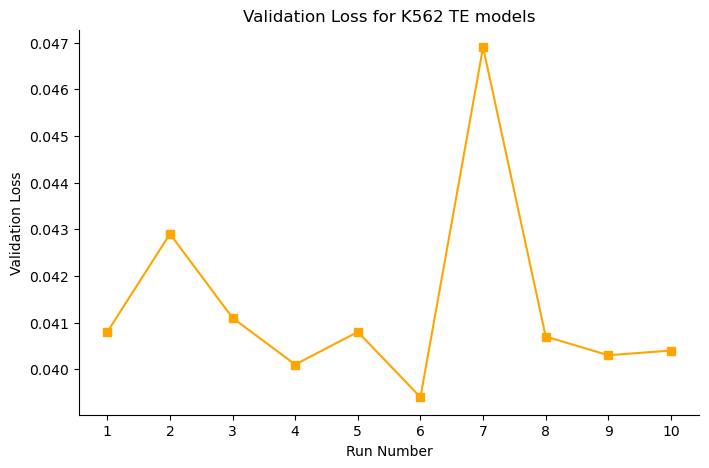

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_TE_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_TE_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='orange')
plt.title("Validation Loss for K562 TE models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


#### Loss comparison for K562-BlueSTARR-1000bp models

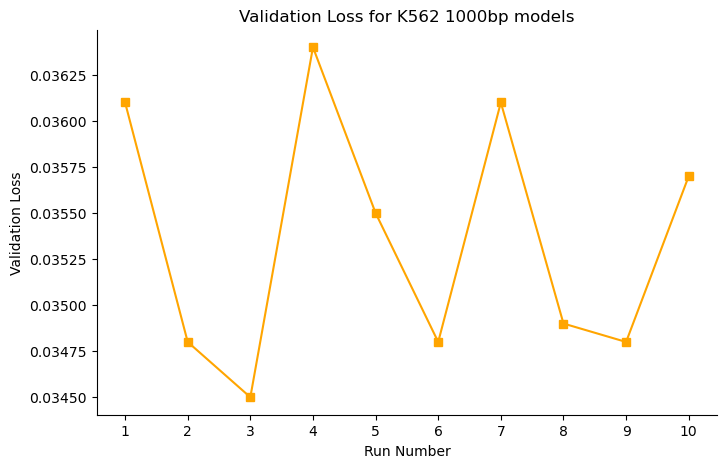

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_1000bp_v1_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_1000bp_v1_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='orange')
plt.title("Validation Loss for K562 1000bp models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


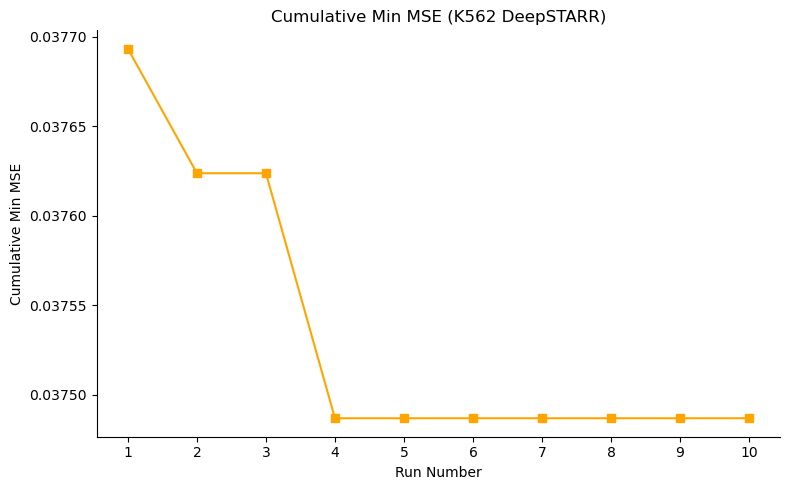

In [2]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_DeepSTARR_*.out")
files = glob.glob(pattern)

Loss = {}

# Extract validation losses per run
for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_DeepSTARR_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "mse" in line:
                mse_match = re.search(r"K562 mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    Loss[run_num] = mse
                break

# Sort runs by run number
Loss = dict(sorted(Loss.items()))

# Create cumulative minimum list
run_numbers = list(Loss.keys())
val_losses = list(Loss.values())

cumulative_min = []
current_min = float('inf')
for loss in val_losses:
    current_min = min(current_min, loss)
    cumulative_min.append(current_min)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(run_numbers, cumulative_min, marker='s', color='orange')
plt.title("Cumulative Min MSE (K562 DeepSTARR)")
plt.xlabel("Run Number")
plt.ylabel("Cumulative Min MSE")
plt.xticks(run_numbers)
sns.despine()
plt.tight_layout()
plt.show()


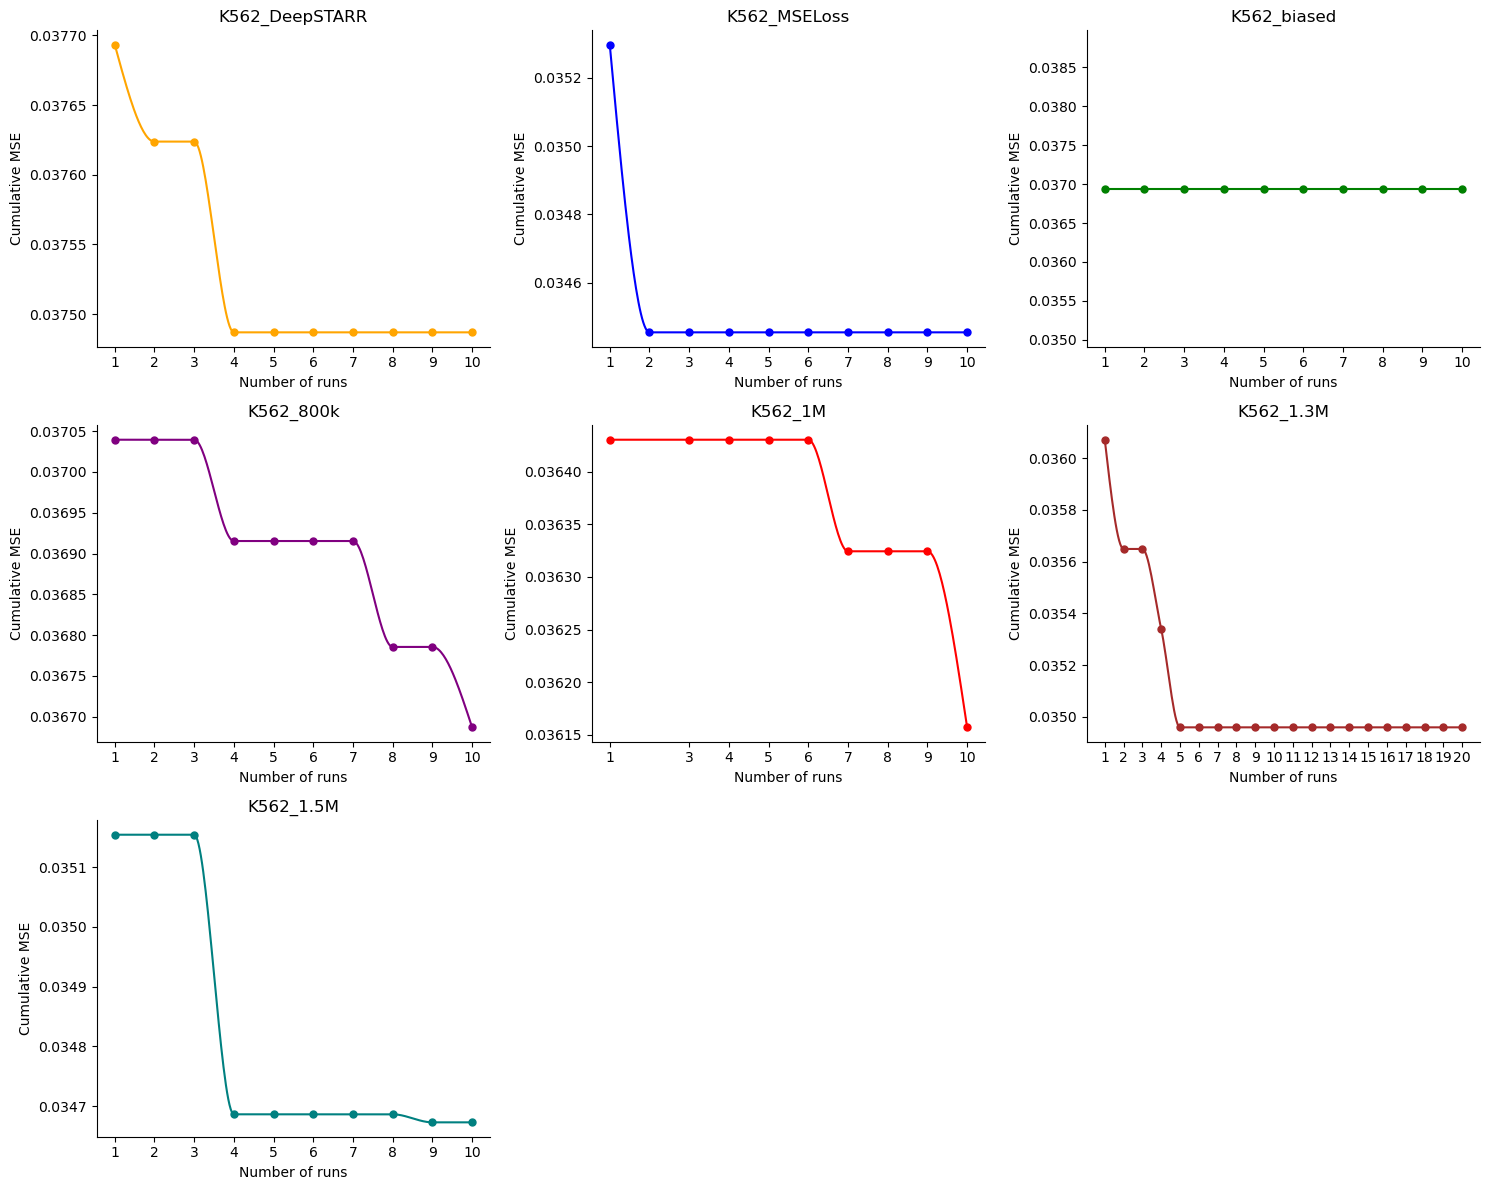

In [1]:
import os
import re
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import PchipInterpolator

# Set log directory and model name patterns
log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
model_prefixes = {
    "K562_DeepSTARR": "orange",
    "K562_MSELoss": "blue",
    "K562_biased": "green",
    "K562_800k": "purple",
    "K562_1M": "red",
    "K562_1.3M": "brown",
    "K562_1.5M": "teal"
}

# Determine subplot grid size
num_models = len(model_prefixes)
cols = 3
rows = int(np.ceil(num_models / cols))

fig, axs = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axs = axs.flatten()  # Flatten 2D axes array for easy indexing

for idx, (model_name, color) in enumerate(model_prefixes.items()):
    pattern = os.path.join(log_dir, f"{model_name}_*.out")
    files = glob.glob(pattern)

    val_losses = {}

    # Extract validation losses
    for file in files:
        filename = os.path.splitext(os.path.basename(file))[0]
        match = re.match(fr"{model_name}_(\d+)", filename)
        if not match:
            continue
        run_num = int(match.group(1))
        with open(file, 'r') as f:
            for line in f:
                if "K562 mse" in line:
                    mse_match = re.search(r"K562 mse=\s*([0-9eE\+\.-]+)", line)
                    if mse_match:
                        val_losses[run_num] = float(mse_match.group(1))
                    break

    if not val_losses:
        axs[idx].set_title(f"{model_name} (No Data Found)")
        axs[idx].axis("off")
        continue

    val_losses = dict(sorted(val_losses.items()))
    run_numbers = list(val_losses.keys())
    losses = list(val_losses.values())

    # Cumulative min
    cumulative_min = []
    current_min = float('inf')
    for loss in losses:
        current_min = min(current_min, loss)
        cumulative_min.append(current_min)

    # Smoothing
    x = np.array(run_numbers)
    y = np.array(cumulative_min)
    x_smooth = np.linspace(x.min(), x.max(), 300)
    pchip = PchipInterpolator(x, y)
    y_smooth = pchip(x_smooth)

    # Plot on its subplot
    ax = axs[idx]
    ax.plot(x_smooth, y_smooth, color=color)
    ax.scatter(x, y, color=color, s=25)
    ax.set_title(model_name)
    ax.set_xlabel("Number of runs")
    ax.set_ylabel("Cumulative MSE")
    ax.set_xticks(run_numbers)
    

# Hide any unused subplots
for j in range(idx + 1, len(axs)):
    axs[j].axis("off")

sns.despine()
plt.tight_layout()
plt.show()


## New Custom Loss for K562 models

Comparison with the MSE loss

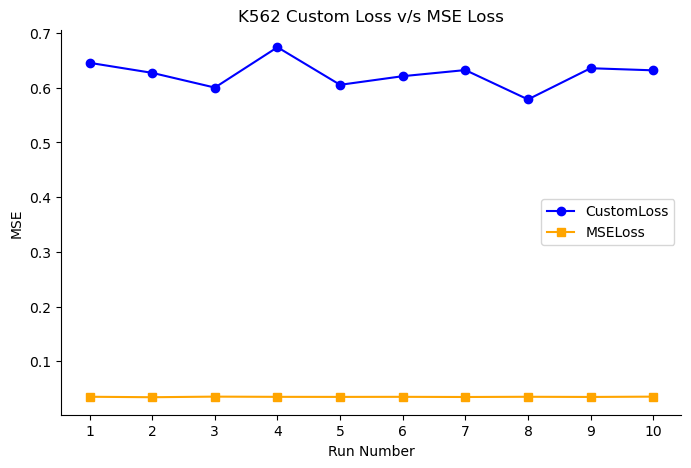

In [3]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_(CustomLoss|MSELoss)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "CustomLoss":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break


customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(customloss.keys()), list(customloss.values()), marker='o', label='CustomLoss', color='blue')
plt.plot(list(mseloss.keys()), list(mseloss.values()), marker='s', label='MSELoss', color='orange')
plt.title("K562 Custom Loss v/s MSE Loss")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
plt.legend()
sns.despine()
plt.show()


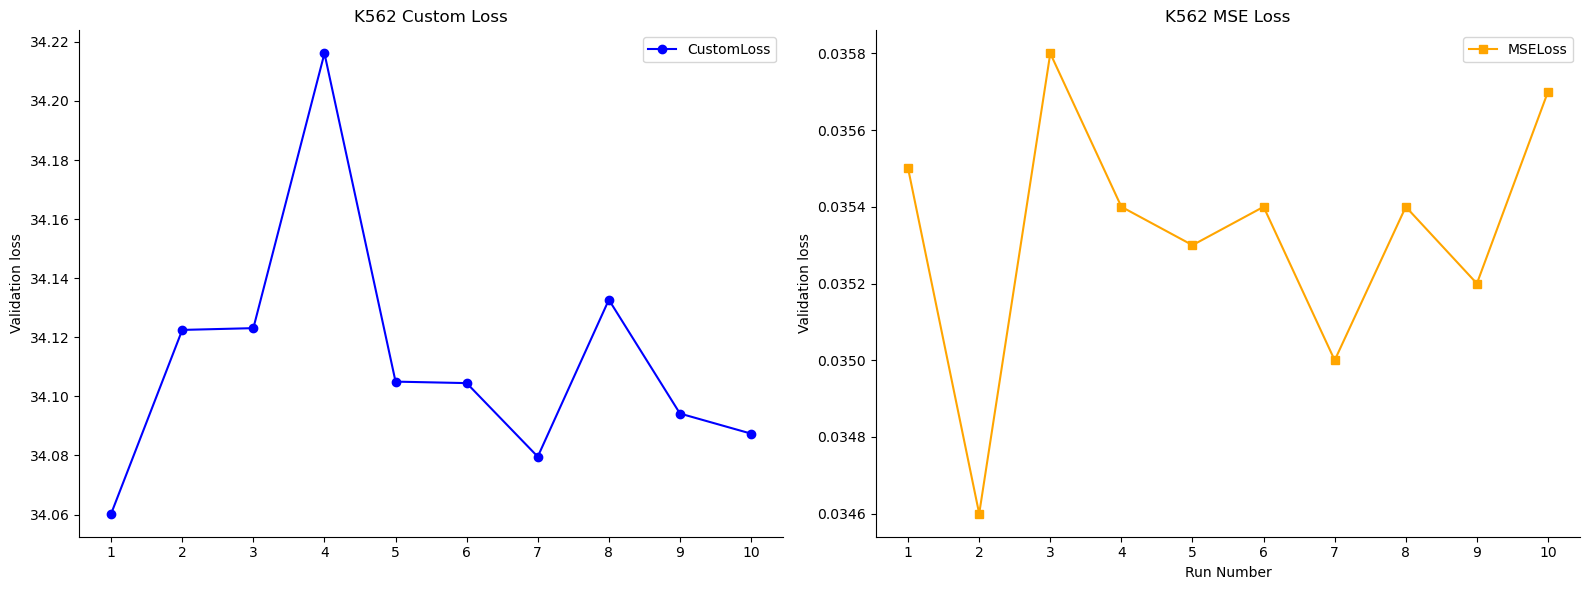

In [2]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_(CustomLoss|MSELoss)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "CustomLoss":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break

# sort dictionaries by run number
customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)

# Plot CustomLoss
axes[0].plot(list(customloss.keys()), list(customloss.values()), 
             marker='o', color='blue', label='CustomLoss')
axes[0].set_title("K562 Custom Loss")
axes[0].set_ylabel("Validation loss")
axes[0].legend()
sns.despine(ax=axes[0])

# Plot MSELoss
axes[1].plot(list(mseloss.keys()), list(mseloss.values()), 
             marker='s', color='orange', label='MSELoss')
axes[1].set_title("K562 MSE Loss")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("Validation loss")
axes[1].set_xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


In [1]:
### Add the code for plotting the training and validation loss for the custom loss and mse loss 
### along with the same curves for the test custom loss 

### New custom loss models with updated script 
(change in libRatio - changed to RnaLibs/(sumDnaLibs/NumX))

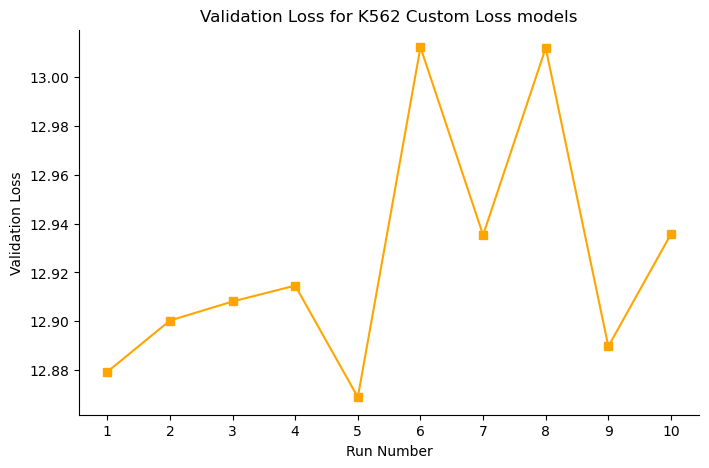

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_CustomLoss_v1_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_CustomLoss_v1_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='orange')
plt.title("Validation Loss for K562 Custom Loss models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


#### Training and validation loss for the new custom model with the corrected libRatio

Found 10 files


SyntaxError: invalid decimal literal (<unknown>, line 1)

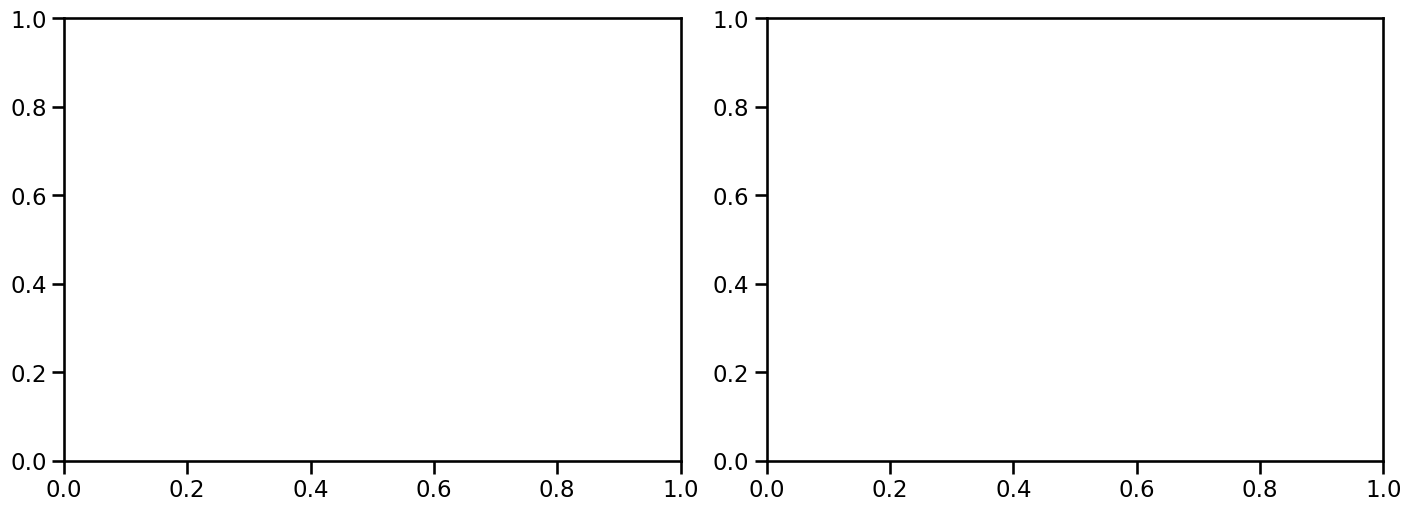

In [1]:

import ast, glob, os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")

# Pick up all matching .out files
pattern = "/hpc/home/rv103/igvf/revathy/models/logs/K562_CustomLoss_v1_*.out"
files = sorted(glob.glob(pattern))
print(f"Found {len(files)} files")

def parse_losses(path):
    train, val = [], []
    last_full = None
    with open(path, "r") as f:
        for line in f:
            if "loss" not in line or "val_loss" not in line:
                continue
            d = ast.literal_eval(line.strip())
            if isinstance(d.get("loss"), list) and isinstance(d.get("val_loss"), list):
                last_full = d
            else:
                train.append(float(d["loss"]))
                val.append(float(d["val_loss"]))
    if last_full:
        return last_full["loss"], last_full["val_loss"]
    return train, val

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), constrained_layout=True)

for file in files:
    train, val = parse_losses(file)
    label = os.path.basename(file)
    if train:
        ax1.plot(range(1, len(train) + 1), train, alpha=0.5, linewidth=1.3, label=label)
    if val:
        ax2.plot(range(1, len(val) + 1), val, alpha=0.5, linewidth=1.3, label=label)

ax1.set_title("Training Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(fontsize=8, frameon=False)

ax2.set_title("Validation Loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend(fontsize=8, frameon=False)

sns.despine()
plt.show()


### Custom loss vs MSE loss comparison - scaled 0.15

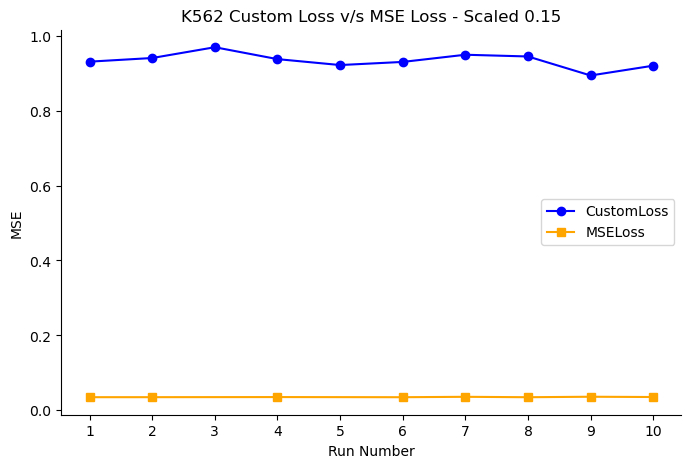

In [7]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Scaled_15_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_Scaled_15_(Custom|MSE)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Custom":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break


customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(customloss.keys()), list(customloss.values()), marker='o', label='CustomLoss', color='blue')
plt.plot(list(mseloss.keys()), list(mseloss.values()), marker='s', label='MSELoss', color='orange')
plt.title("K562 Custom Loss v/s MSE Loss - Scaled 0.15")
plt.xlabel("Run Number")
plt.ylabel("MSE")
plt.xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
plt.legend()
sns.despine()
plt.show()
    

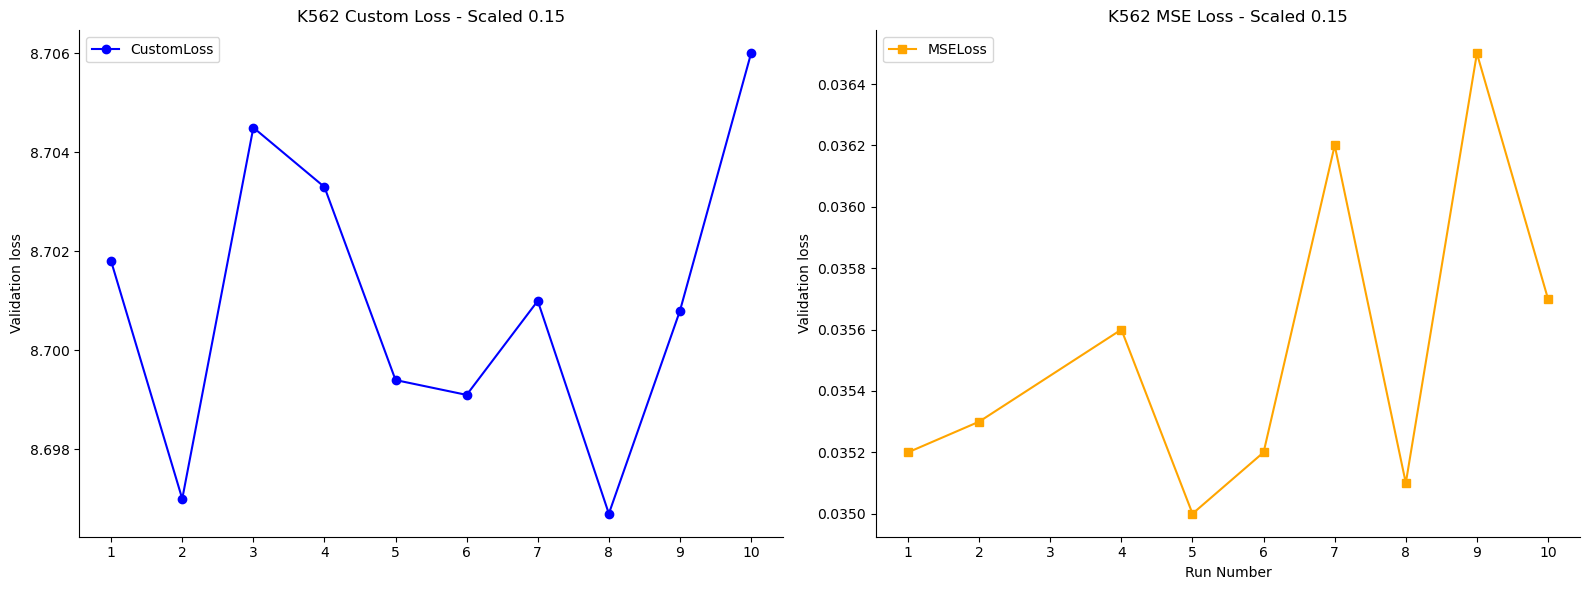

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Scaled_15_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_Scaled_15_(Custom|MSE)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Custom":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break

# sort dictionaries by run number
customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)

# Plot CustomLoss
axes[0].plot(list(customloss.keys()), list(customloss.values()), 
             marker='o', color='blue', label='CustomLoss')
axes[0].set_title("K562 Custom Loss - Scaled 0.15")
axes[0].set_ylabel("Validation loss")
axes[0].legend()
sns.despine(ax=axes[0])

# Plot MSELoss
axes[1].plot(list(mseloss.keys()), list(mseloss.values()), 
             marker='s', color='orange', label='MSELoss')
axes[1].set_title("K562 MSE Loss - Scaled 0.15")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("Validation loss")
axes[1].set_xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


### Training and validation loss comparison for the K562-Custom loss and MSE loss models

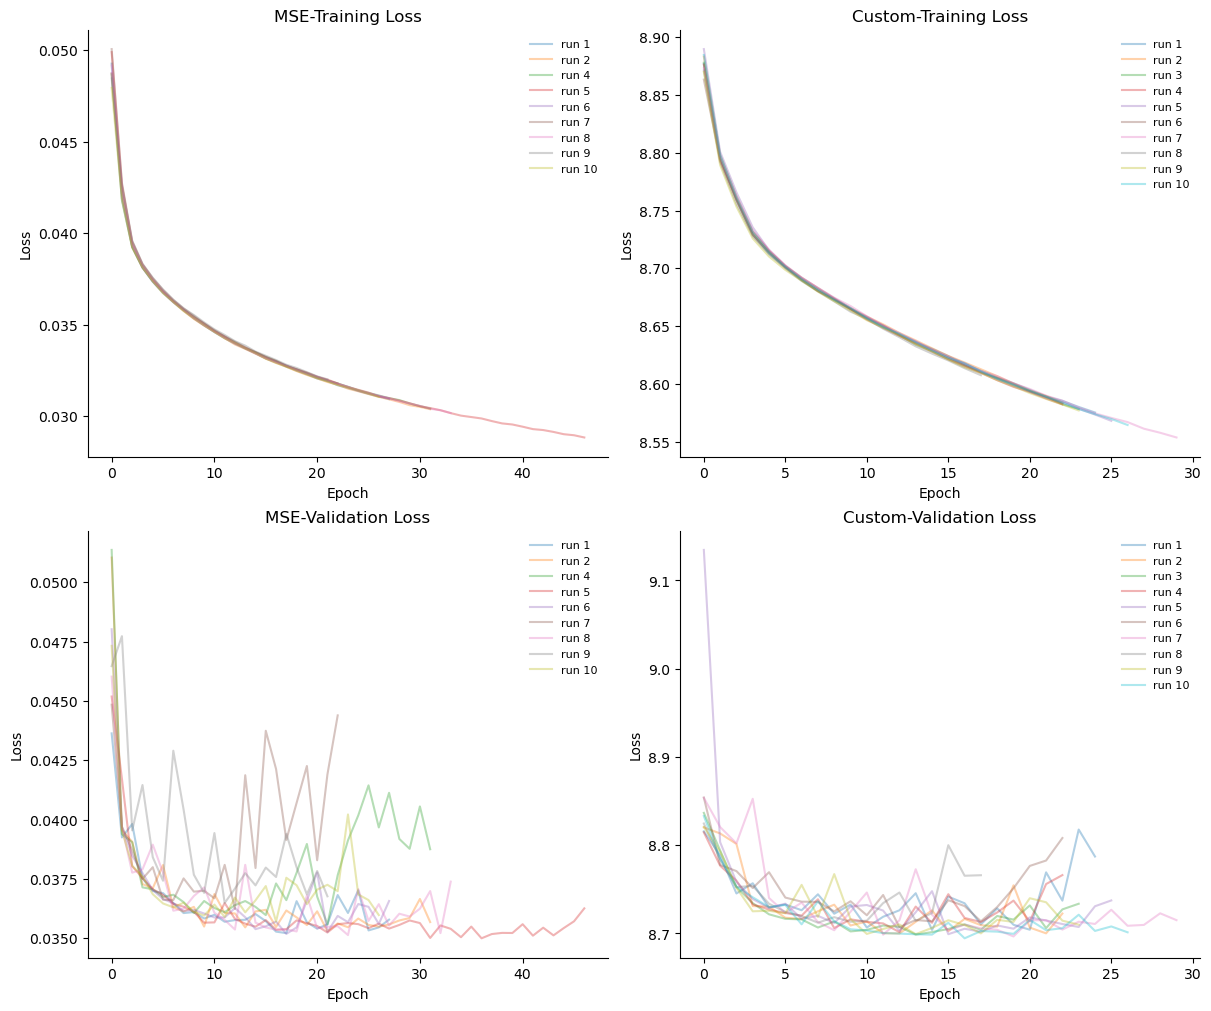

In [4]:
import os
import re
import glob
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Scaled_15_*.out")
files = glob.glob(pattern)

losses = {'Custom': {}, 'MSE': {}}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"K562_Scaled_15_(Custom|MSE)_(\d+)", filename)
    if not match:
        continue

    condition = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if line.strip().startswith("{'loss':"):
                try:
                    loss_dict = ast.literal_eval(line.strip())
                    if 'loss' in loss_dict and 'val_loss' in loss_dict:
                        losses[condition][run_num] = loss_dict
                except Exception as e:
                    print(f"Error parsing loss from {file}: {e}")
                break

# Sort runs by run number
for condition in losses:
    losses[condition] = dict(sorted(losses[condition].items()))

# Helper to plot one panel
def plot_runs(ax, runs_dict, key, title):
    if not runs_dict:
        ax.text(0.5, 0.5, "No data", ha='center', va='center', fontsize=12)
        ax.set_title(title)
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        return
    for run_num, run_losses in runs_dict.items():
        y = run_losses.get(key, [])
        if y is None: 
            y = []
        ax.plot(y, alpha=0.35, linewidth=1.5, label=f"run {run_num}")
    ax.set_title(title)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend(fontsize=8, frameon=False)
    sns.despine(ax=ax)


fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True, sharex=False, sharey=False)
plot_runs(axes[0, 0], losses.get('MSE', {}),      key='loss',     title="MSE-Training Loss")
plot_runs(axes[0, 1], losses.get('Custom', {}),   key='loss',     title="Custom-Training Loss")
plot_runs(axes[1, 0], losses.get('MSE', {}),      key='val_loss', title="MSE-Validation Loss")
plot_runs(axes[1, 1], losses.get('Custom', {}),   key='val_loss', title="Custom-Validation Loss")

plt.show()


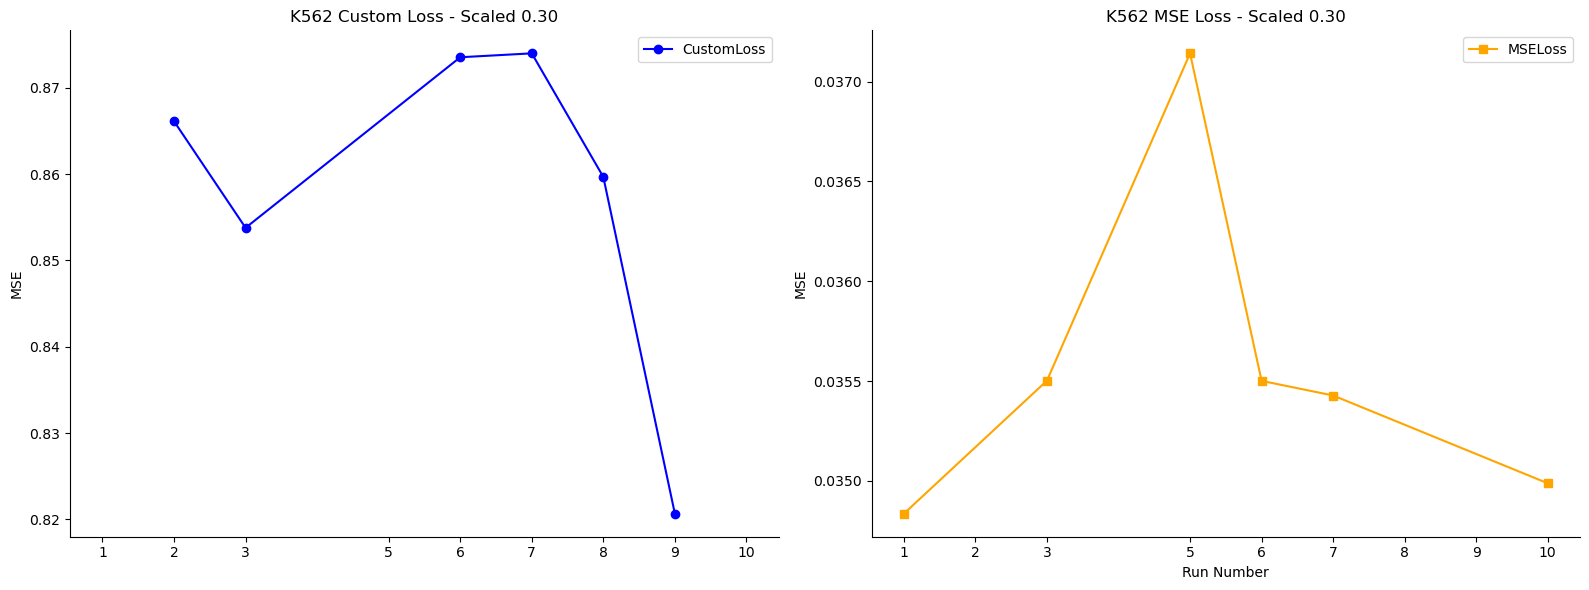

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Scaled_30_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_Scaled_30_(Custom|MSE)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Custom":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break


customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))


fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)

axes[0].plot(list(customloss.keys()), list(customloss.values()), 
             marker='o', color='blue', label='CustomLoss')
axes[0].set_title("K562 Custom Loss - Scaled 0.30")
axes[0].set_ylabel("MSE")
axes[0].legend()
sns.despine(ax=axes[0])

axes[1].plot(list(mseloss.keys()), list(mseloss.values()), 
             marker='s', color='orange', label='MSELoss')
axes[1].set_title("K562 MSE Loss - Scaled 0.30")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("MSE")
axes[1].set_xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


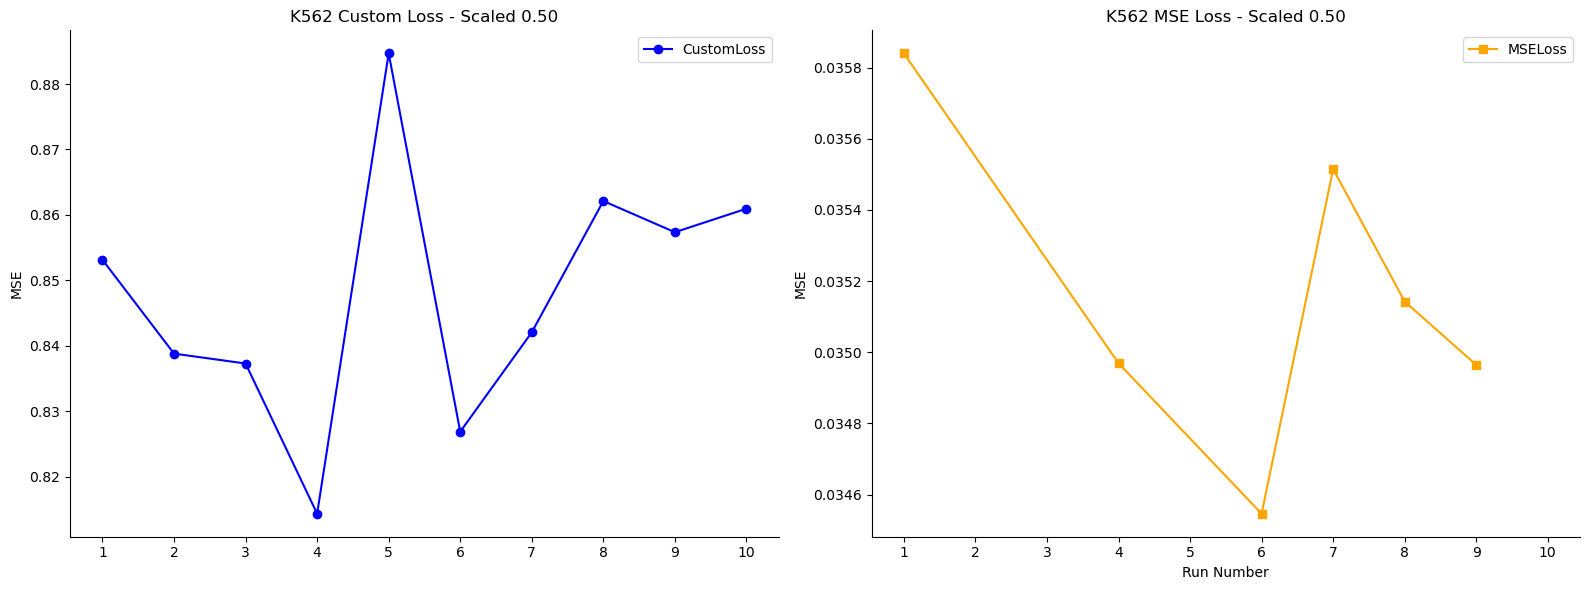

In [2]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Scaled_50_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_Scaled_50_(Custom|MSE)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "K562 mse" in line:
                mse_match = re.search(r"mse=\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Custom":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break

# sort dictionaries by run number
customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)

# Plot CustomLoss
axes[0].plot(list(customloss.keys()), list(customloss.values()), 
             marker='o', color='blue', label='CustomLoss')
axes[0].set_title("K562 Custom Loss - Scaled 0.50")
axes[0].set_ylabel("MSE")
axes[0].legend()
sns.despine(ax=axes[0])

# Plot MSELoss
axes[1].plot(list(mseloss.keys()), list(mseloss.values()), 
             marker='s', color='orange', label='MSELoss')
axes[1].set_title("K562 MSE Loss - Scaled 0.50")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("MSE")
axes[1].set_xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


### Custom Loss - Oct14 - Corrected code from Bill with Jacobian

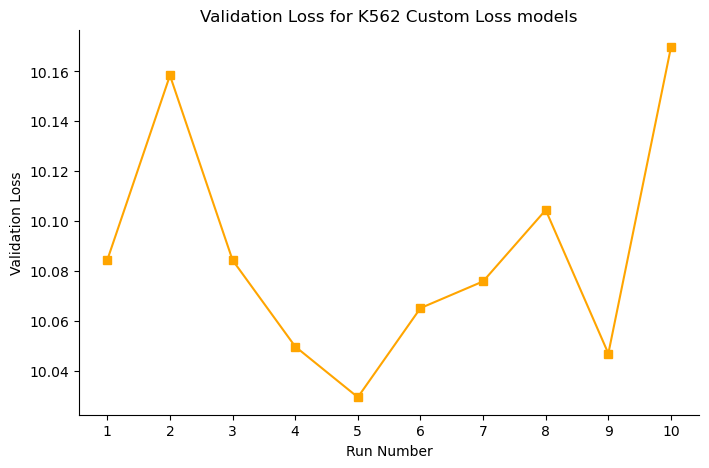

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_CustomLoss_v1_*.out")
files = glob.glob(pattern)

DMSO = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_CustomLoss_v1_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    DMSO[run_num] = mse
                break

DMSO = dict(sorted(DMSO.items()))

plt.figure(figsize=(8, 5))
plt.plot(list(DMSO.keys()), list(DMSO.values()), marker='s', color='orange')
plt.title("Validation Loss for K562 Custom Loss models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(DMSO.keys()))
# plt.legend()
sns.despine()
plt.show()


#### Custom Loss - Scaled 0.15 - Oct 14

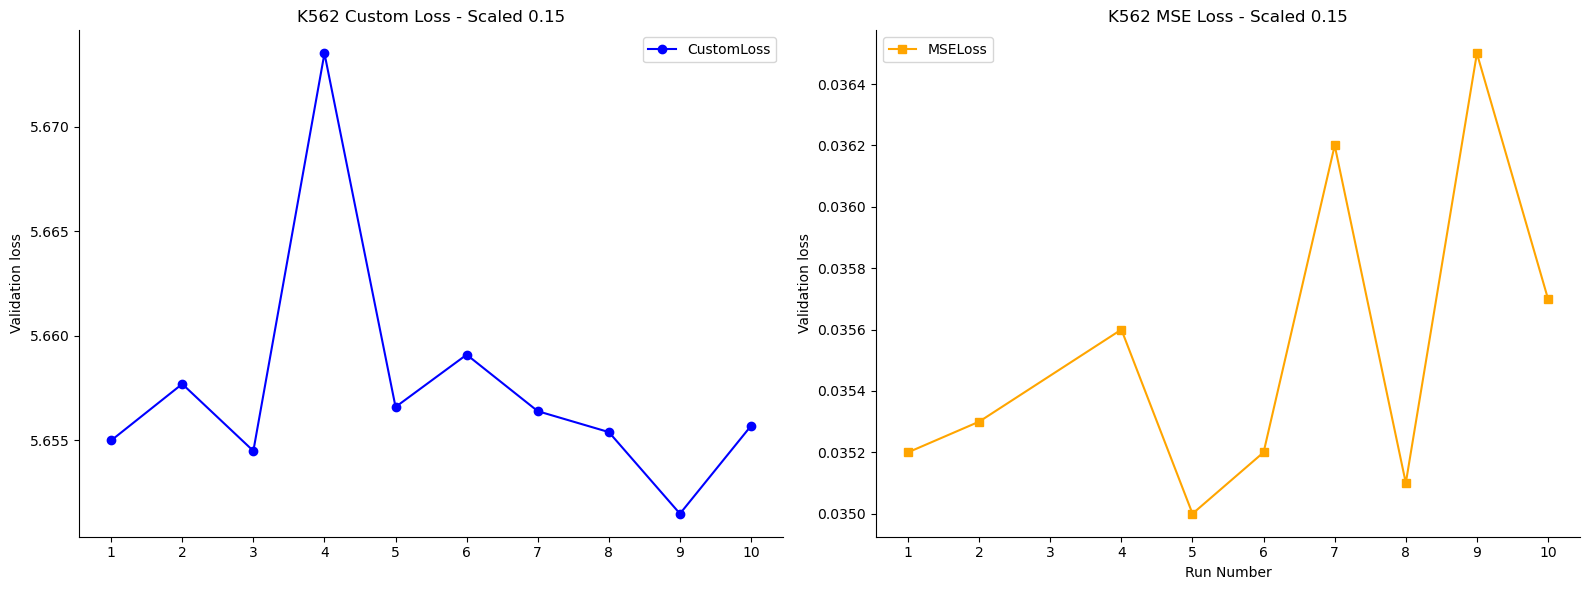

In [1]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_Scaled_15_*.out")
files = glob.glob(pattern)

customloss = {}
mseloss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]  
    match = re.match(r"K562_Scaled_15_(Custom|MSE)_(\d+)", filename)
    if not match:
        continue

    loss_type = match.group(1)
    run_num = int(match.group(2))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    if loss_type == "Custom":
                        customloss[run_num] = mse
                    else:
                        mseloss[run_num] = mse
                break

# sort dictionaries by run number
customloss = dict(sorted(customloss.items()))
mseloss = dict(sorted(mseloss.items()))

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(16, 6), sharex=True)

# Plot CustomLoss
axes[0].plot(list(customloss.keys()), list(customloss.values()), 
             marker='o', color='blue', label='CustomLoss')
axes[0].set_title("K562 Custom Loss - Scaled 0.15")
axes[0].set_ylabel("Validation loss")
axes[0].legend()
sns.despine(ax=axes[0])

# Plot MSELoss
axes[1].plot(list(mseloss.keys()), list(mseloss.values()), 
             marker='s', color='orange', label='MSELoss')
axes[1].set_title("K562 MSE Loss - Scaled 0.15")
axes[1].set_xlabel("Run Number")
axes[1].set_ylabel("Validation loss")
axes[1].set_xticks(sorted(set(customloss.keys()).union(mseloss.keys())))
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()


### EMSE loss comparison

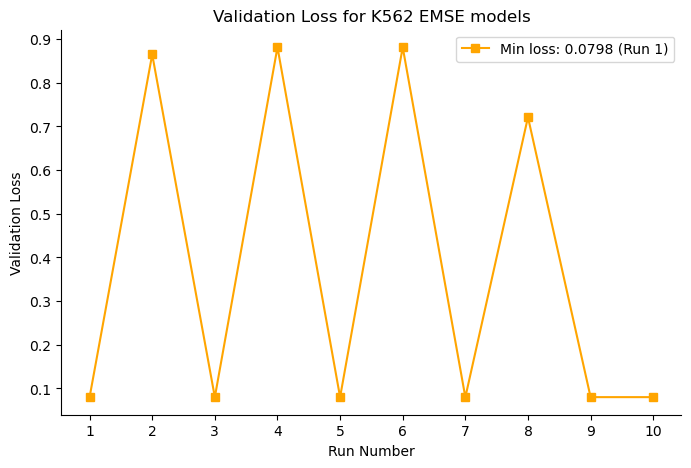

In [4]:
import os
import re
import glob
import matplotlib.pyplot as plt
import seaborn as sns

log_dir = "/hpc/home/rv103/igvf/revathy/models/logs"
pattern = os.path.join(log_dir, "K562_EMSE_*.out")
files = glob.glob(pattern)

loss = {}

for file in files:
    filename = os.path.basename(file).split('.')[0]
    match = re.match(r"K562_EMSE_(\d+)", filename)
    if not match:
        continue

    run_num = int(match.group(1))

    with open(file, 'r') as f:
        for line in f:
            if "Min validation loss" in line:
                mse_match = re.search(r"Min validation loss:\s*([0-9eE\+\.-]+)", line)
                if mse_match:
                    mse = float(mse_match.group(1))
                    loss[run_num] = mse
                break


loss = dict(sorted(loss.items()))


min_run = min(loss, key=loss.get)
min_loss = loss[min_run]


plt.figure(figsize=(8, 5))
plt.plot(list(loss.keys()), list(loss.values()), marker='s', color='orange', label=f"Min loss: {min_loss:.4f} (Run {min_run})")


plt.title("Validation Loss for K562 EMSE models")
plt.xlabel("Run Number")
plt.ylabel("Validation Loss")
plt.xticks(sorted(loss.keys()))
plt.legend()
sns.despine()
plt.show()


## SCALING ISSUE

### Density plots with MSE between naive and predicted theta - Eleanor's models

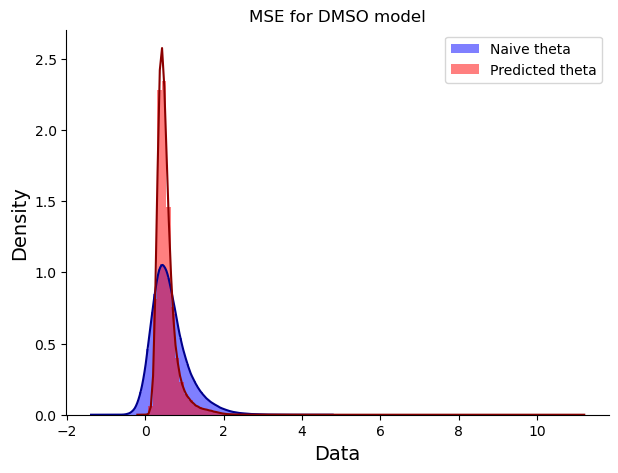

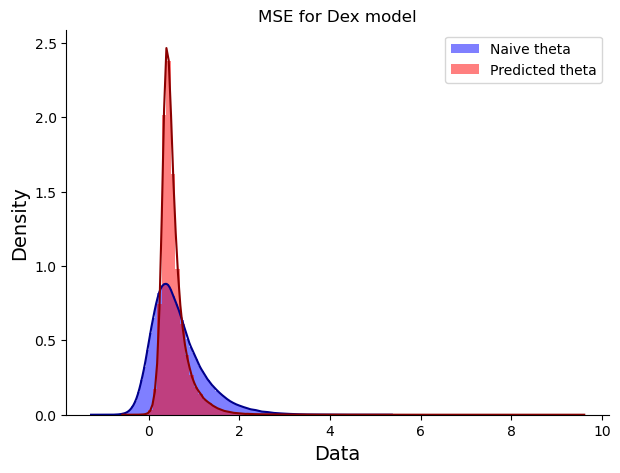

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DMSO_MSEloss = pd.read_csv('/hpc/home/rv103/igvf/SHARED/trained-models/A549_Dex-4_data/DMSO-4.txt', sep='\t')
Dex_MSEloss = pd.read_csv('/hpc/home/rv103/igvf/SHARED/trained-models/A549_Dex-4_data/Dex-4.txt', sep='\t')

plt.figure(figsize=(7,5))
plt.hist(DMSO_MSEloss['true'], density=True, bins=100, alpha=0.5,  color='blue', label="Naive theta")
plt.hist(DMSO_MSEloss['predicted'], density=True, bins=100, alpha=0.5, color='red', label="Predicted theta")
sns.kdeplot(DMSO_MSEloss['true'], color='darkblue')
sns.kdeplot(DMSO_MSEloss['predicted'], color='darkred')
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
plt.title('MSE for DMSO model')
sns.despine()
plt.show()

plt.figure(figsize=(7,5))
plt.hist(Dex_MSEloss['true'], density=True, bins=100, alpha=0.5,  color='blue', label="Naive theta")
plt.hist(Dex_MSEloss['predicted'], density=True, bins=100, alpha=0.5, color='red', label="Predicted theta")
sns.kdeplot(Dex_MSEloss['true'], color='darkblue')
sns.kdeplot(Dex_MSEloss['predicted'], color='darkred')
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
plt.title('MSE for Dex model')
sns.despine()
plt.show()

#### Density plot for Model 3 - DMSO from the loss comparison runs - MSE loss (what I did)

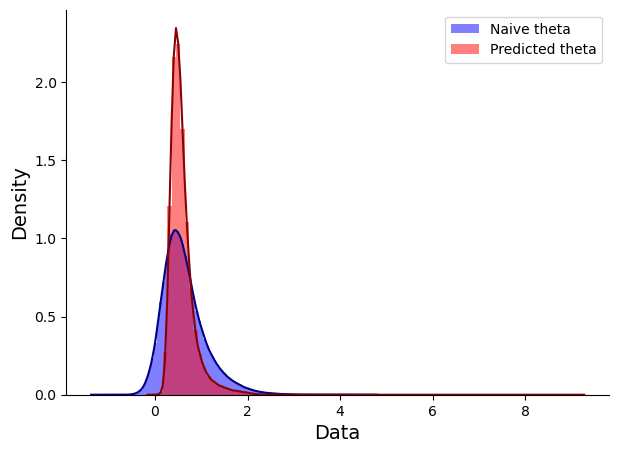

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DMSO_MSEloss = pd.read_csv('/hpc/home/rv103/igvf/revathy/models/mse_loss/DMSO-200/DMSO-3.txt', sep='\t')
# Dex_MSEloss = pd.read_csv('/hpc/home/rv103/igvf/SHARED/trained-models/A549_Dex-4_data/Dex-4.txt', sep='\t')

plt.figure(figsize=(7,5))
plt.hist(DMSO_MSEloss['true'], density=True, bins=100, alpha=0.5,  color='blue', label="Naive theta")
plt.hist(DMSO_MSEloss['predicted'], density=True, bins=100, alpha=0.5, color='red', label="Predicted theta")
sns.kdeplot(DMSO_MSEloss['true'], color='darkblue')
sns.kdeplot(DMSO_MSEloss['predicted'], color='darkred')
plt.xlabel("Data", size=14)
plt.ylabel("Density", size=14)
plt.legend(loc='upper right')
sns.despine()
plt.show()